## Linear Regression Example Using statsmodels.api


In [1]:
import os,sys
import numpy as np
import pandas as pd

import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
print('python',sys.version.split()[0])
print('np',np.__version__)
print('pd',pd.__version__)
print('matplotlib',matplotlib.__version__)
print('sklearn',sklearn.__version__)
print('sns',sns.__version__)
print('sm',sm.__version__)

python 3.9.12
np 1.23.1
pd 1.4.3
matplotlib 3.5.2
sklearn 1.1.1
sns 0.11.2
sm 0.13.2


In [3]:
rng = np.random.RandomState(seed=None)
target = 10 * rng.rand(200)                   # 200 random numbers in [0,10] 
x1 = 2 * target - 5 + rng.randn(200) * 0.5    # two random columns
x2 = 3 * target - 3 + rng.randn(200) * 0.5
df = pd.DataFrame({'target':target,'x1':x1,'x2':x2})

In [4]:
# Shape of our dataset
df.shape

(200, 3)

In [5]:
# Info our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  200 non-null    float64
 1   x1      200 non-null    float64
 2   x2      200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [6]:
# Describe our dataset
df.describe()

,target,x1,x2
count,200.000000,200.000000,200.000000
mean,5.110755,5.191527,12.347450
std,2.909917,5.818245,8.673845
min,0.019624,-5.179901,-3.347806
25%,2.664137,0.036414,5.005086
50%,5.143176,5.302439,12.504569
75%,7.760262,10.259197,20.251726
max,9.947676,15.233039,27.144816


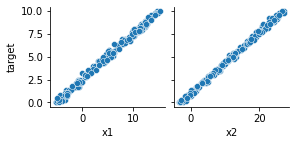

In [7]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['x1','x2'], y_vars='target', 
             height=2, aspect=1, kind='scatter')
plt.show()

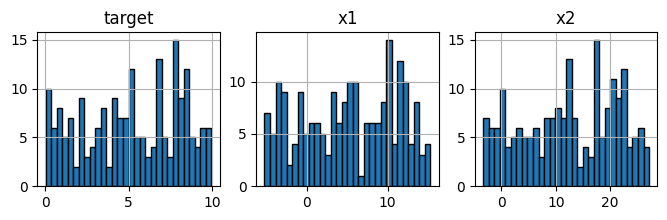

In [8]:
df.hist(figsize=(8, 2), layout=(1,3), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.4, wspace=0.2)

### One-dimensional Linear Regression

In [9]:
# Creating X and y
X = df['x1']
y = df['target']

In [10]:
# Splitting the varaibles as training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [11]:
# Take a look at the train dataset
print(X_train)
print("-"*40)
print(y_train)

74     11.538092
3       8.301283
185    -1.050606
26      1.623966
90     12.005499
         ...    
87      7.629076
103     9.388192
67     12.379178
24     13.750936
8       2.063595
Name: x1, Length: 140, dtype: float64
----------------------------------------
74     7.911260
3      6.897781
185    2.086998
26     3.380648
90     8.331182
         ...   
87     6.609142
103    7.177397
67     8.800715
24     9.476464
8      3.954797
Name: target, Length: 140, dtype: float64


In [12]:
# According to documentation, 
# we need to add a column with ones to get intercept:
# https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html
    
# Add a column of ones to an array
X_train_sm = sm.add_constant(X_train)
print(X_train.head())
print("-"*40)
print(X_train_sm.head())

74     11.538092
3       8.301283
185    -1.050606
26      1.623966
90     12.005499
Name: x1, dtype: float64
----------------------------------------
     const         x1
74     1.0  11.538092
3      1.0   8.301283
185    1.0  -1.050606
26     1.0   1.623966
90     1.0  12.005499


In [13]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
# (const = intercept, x1 = slope)
lr.params

const    2.536182
x1       0.496574
dtype: float64

In [14]:
# formula: y = a + bx
a = lr.params['const']
b = lr.params['x1']
print(f"a={a:.3f}, b={b:.3f}")

a=2.536, b=0.497


In [15]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.757e+04
Date:                Thu, 29 Dec 2022   Prob (F-statistic):          2.27e-147
Time:                        13:16:13   Log-Likelihood:                -6.2988
No. Observations:                 140   AIC:                             16.60
Df Residuals:                     138   BIC:                             22.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5362      0.029     87.141      0.000       2.479       2.594
x1             0.4966      0.004    132.561      0.000       0.489       0.504
==============================================================================
Omnibus:                        2.231   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                2.030
Skew:                           0.295   Prob(JB):                        0.362
Kurtosis:                       3.002   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

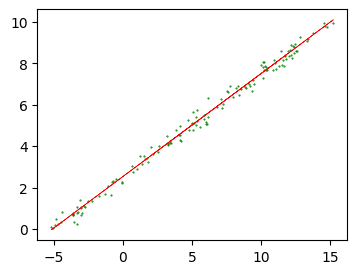

In [16]:
# Visualizing the regression line
fig = plt.figure(figsize=(4,3))
plt.scatter(X_train, y_train,marker='.', s=1, color='g')
plt.plot(X_train, a + b*X_train, lw=0.5, color='r')
plt.show()

In [17]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

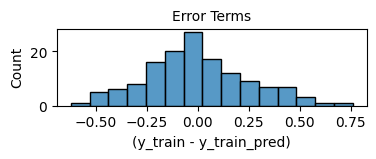

In [18]:
# Plotting the histogram using the residual values
fig = plt.figure(figsize=(4,1))
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 10)
plt.xlabel('(y_train - y_train_pred)', fontsize = 10)
plt.show()

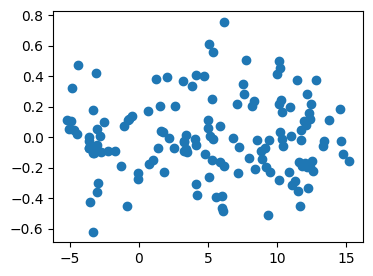

In [19]:
# Looking for any patterns in the residuals
fig = plt.figure(figsize=(4,3))
plt.scatter(X_train,res)
plt.show()

In [20]:
# now using the model on the "test" data

# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 10 predicted values
y_test_pred.head(10)

126    2.806103
104    1.988845
99     2.349726
92     9.356013
111    5.517243
167    8.124196
116    7.199562
96     0.640238
52     7.390090
69     2.111341
dtype: float64

In [21]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
print(f"r_squared = {r_squared:.4f}")

r_squared = 0.9936


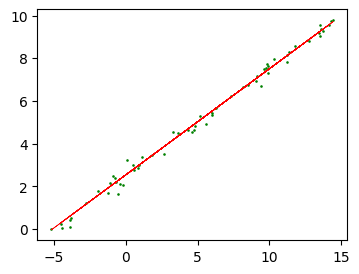

In [22]:
# Visualize the line on the test set

fig = plt.figure(figsize=(4,3))
plt.scatter(X_test, y_test, marker='.', s=3, color='g')
plt.plot(X_test, y_test_pred, lw=0.5, color='r')
plt.show()